In [1]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/artofstat/ArtistDiversity/master/artistdata.csv')

df

,artist,museum,gender,ethnicity,GEO3major,year
0,Kikugawa Eishin (Hideyoshi),Art Institute of Chicago,NaN,asian,Asia and the Pacific,NaN
1,Gordon C. Abbott,Art Institute of Chicago,man,white,North America,1880.0
2,Sigmund Abeles,Art Institute of Chicago,man,white,North America,1930.0
3,Albrecht Adam,Art Institute of Chicago,man,white,Europe,1790.0
4,Architects David Adler,Art Institute of Chicago,man,white,NaN,1880.0
...,...,...,...,...,...,...
10103,Magnus Zeller,Yale University Art Gallery,man,white,Europe,1890.0
10104,Sun Zhi,Yale University Art Gallery,man,asian,Asia and the Pacific,NaN
10105,Rufus Fairchild Zogbaum,Yale University Art Gallery,man,white,North America,1850.0
10106,Anders Leonard Zorn,Yale University Art Gallery,man,white,Europe,1860.0


In [12]:
df.sample()

,artist,museum,gender,ethnicity,GEO3major,year
6026,Nachume Miller,Museum of Modern Art,man,other,Europe,1950.0


In [14]:
df.columns

Index(['artist', 'museum', 'gender', 'ethnicity', 'GEO3major', 'year'], dtype='object')

In [15]:
df.dtypes

artist        object
museum        object
gender        object
ethnicity     object
GEO3major     object
year         float64
dtype: object

In [16]:
df['artist']

0        Kikugawa Eishin (Hideyoshi)
1                   Gordon C. Abbott
2                     Sigmund Abeles
3                      Albrecht Adam
4             Architects David Adler
                    ...             
10103                  Magnus Zeller
10104                        Sun Zhi
10105        Rufus Fairchild Zogbaum
10106            Anders Leonard Zorn
10107               Francisco Zuniga
Name: artist, Length: 10108, dtype: object

In [17]:
df.describe()

,year
count,8026.000000
mean,1865.613008
std,123.300324
min,-400.000000
25%,1830.000000
50%,1900.000000
75%,1940.000000
max,1990.000000


In [19]:
df.loc[df['gender'] == 'man']

,artist,museum,gender,ethnicity,GEO3major,year
1,Gordon C. Abbott,Art Institute of Chicago,man,white,North America,1880.0
2,Sigmund Abeles,Art Institute of Chicago,man,white,North America,1930.0
3,Albrecht Adam,Art Institute of Chicago,man,white,Europe,1790.0
4,Architects David Adler,Art Institute of Chicago,man,white,NaN,1880.0
5,Vargi A. Aivazian,Art Institute of Chicago,man,white,Europe,1910.0
...,...,...,...,...,...,...
10103,Magnus Zeller,Yale University Art Gallery,man,white,Europe,1890.0
10104,Sun Zhi,Yale University Art Gallery,man,asian,Asia and the Pacific,NaN
10105,Rufus Fairchild Zogbaum,Yale University Art Gallery,man,white,North America,1850.0
10106,Anders Leonard Zorn,Yale University Art Gallery,man,white,Europe,1860.0


In [41]:
# search for women artists
df.loc[df['gender'] == 'woman']

,artist,museum,gender,ethnicity,GEO3major,year
9,Anna Kirstine Ancher,Art Institute of Chicago,woman,white,Europe,1860.0
25,Lutz Bacher,Art Institute of Chicago,woman,white,North America,NaN
49,Catarina Bremselin,Art Institute of Chicago,woman,white,NaN,NaN
70,Vija Celmins,Art Institute of Chicago,woman,white,Europe,1940.0
82,Sue Coe,Art Institute of Chicago,woman,white,Europe,1950.0
...,...,...,...,...,...,...
10053,Sylvia Wald,Yale University Art Gallery,woman,white,North America,1920.0
10060,Wenda Von Weise,Yale University Art Gallery,woman,NaN,North America,1940.0
10072,Megan Williams,Yale University Art Gallery,woman,white,NaN,1960.0
10080,Bess Wohl,Yale University Art Gallery,woman,white,North America,NaN


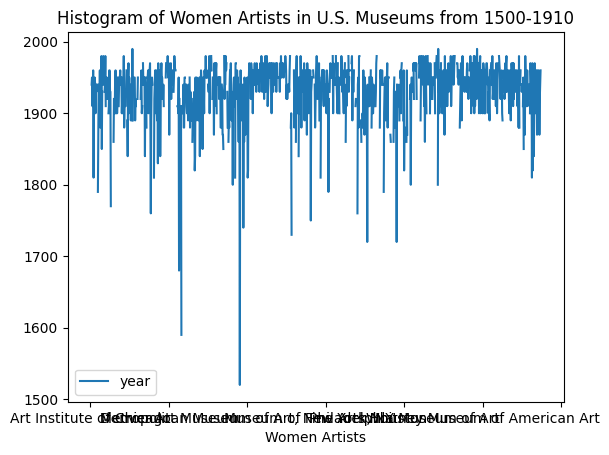

In [27]:
# Visualizations
# note: parameters are not displaying as intended? Since 'year' is the only float data type, it has to be on the y-axis

df.loc[df['gender'] == 'woman'].plot(x='museum', y='year')
plt.title('Histogram of Women Artists in U.S. Museums from 1500-1910')
plt.xlabel('Women Artists')
plt.show()

<AxesSubplot: ylabel='ethnicity'>

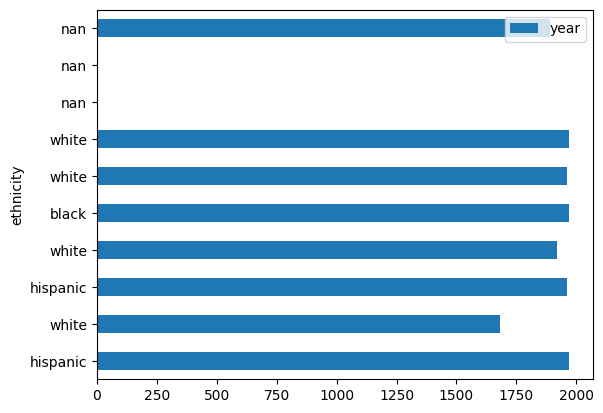

In [17]:
# Confused why null values show up when supposed to be removed
# confused where there are multiple "white" or other ethnicities when the data was all from one column

df.sort_values(by='gender',ascending=True)[-10:].plot.barh(x='ethnicity',y='year')

In [9]:
# Data cleaning

In [7]:
# are there null values?
df.isna().any()

artist       False
museum       False
gender        True
ethnicity     True
GEO3major     True
year          True
dtype: bool

In [8]:
# null values
df.isna(). sum()

artist          0
museum          0
gender       1092
ethnicity    1812
GEO3major    1676
year         2082
dtype: int64

In [10]:
df.isna().any().sum()

4

In [14]:
df.dropna(subset=['gender'], inplace = True)

In [30]:
for x in df.index:
  if df.loc[x, "gender"] == 'NaN':
    df.drop(x, inplace = True)

<AxesSubplot: ylabel='ethnicity'>

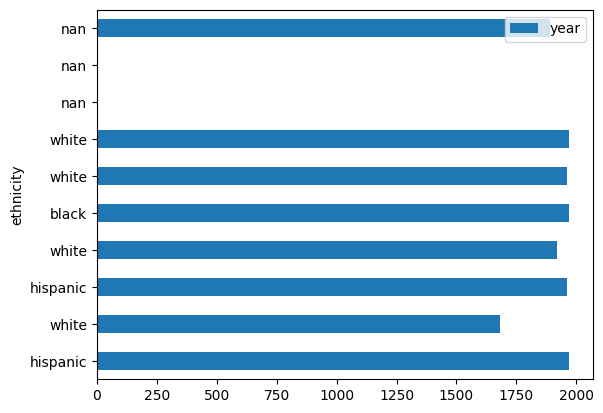

In [31]:
df.dropna(subset=['gender'], inplace = True)
for x in df.index:
  if df.loc[x, "gender"] == 'NaN':
    df.drop(x, inplace = True)
df.sort_values(by='gender',ascending=True)[-10:].plot.barh(x='ethnicity',y='year')

<AxesSubplot: >

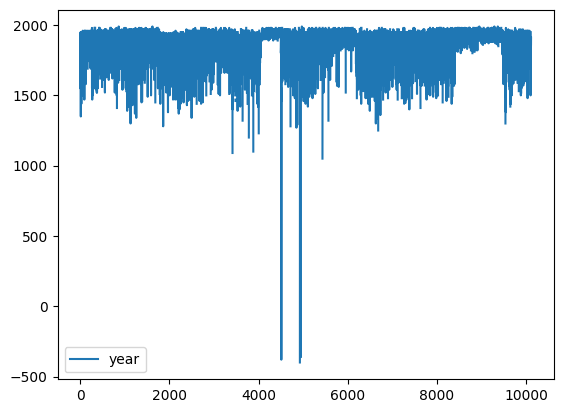

In [32]:
# plot of all data from dataset
df.plot()

In [33]:
# tried to trim whitespace to see if format was messing with the plot graphs

df['ethnicity'] = df['ethnicity'].str.strip()
print(df)

                        artist                       museum gender ethnicity  \
1             Gordon C. Abbott     Art Institute of Chicago    man     white   
2               Sigmund Abeles     Art Institute of Chicago    man     white   
3                Albrecht Adam     Art Institute of Chicago    man     white   
4       Architects David Adler     Art Institute of Chicago    man     white   
5            Vargi A. Aivazian     Art Institute of Chicago    man     white   
...                        ...                          ...    ...       ...   
10103            Magnus Zeller  Yale University Art Gallery    man     white   
10104                  Sun Zhi  Yale University Art Gallery    man     asian   
10105  Rufus Fairchild Zogbaum  Yale University Art Gallery    man     white   
10106      Anders Leonard Zorn  Yale University Art Gallery    man     white   
10107         Francisco Zuniga  Yale University Art Gallery    man       NaN   

                             GEO3major 

In [9]:
df.loc[df['artist']== 'museum']

,artist,museum,gender,ethnicity,GEO3major,year
